In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
data = pd.read_csv("student-mat.csv")
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [6]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [4]:
labelEncoder = preprocessing.LabelEncoder()

In [7]:
data["school"] = labelEncoder.fit_transform(data["school"])
data["sex"] = labelEncoder.fit_transform(data["sex"])
data["famsize"] = labelEncoder.fit_transform(data["famsize"])
data["Pstatus"] = labelEncoder.fit_transform(data["Pstatus"])
data["Mjob"] = labelEncoder.fit_transform(data["Mjob"])
data["Fjob"] = labelEncoder.fit_transform(data["Fjob"])
data["reason"] = labelEncoder.fit_transform(data["reason"])
data["guardian"] = labelEncoder.fit_transform(data["guardian"])
data["schoolsup"] = labelEncoder.fit_transform(data["schoolsup"])
data["famsup"] = labelEncoder.fit_transform(data["famsup"])
data["paid"] = labelEncoder.fit_transform(data["paid"])
data["activities"] = labelEncoder.fit_transform(data["activities"])
data["nursery"] = labelEncoder.fit_transform(data["nursery"])
data["higher"] = labelEncoder.fit_transform(data["higher"])
data["internet"] = labelEncoder.fit_transform(data["internet"])
data["romantic"] = labelEncoder.fit_transform(data["romantic"])

In [8]:
data.drop("G1", axis = 1, inplace = True)
data.drop("G2", axis = 1, inplace = True)

In [9]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,0,0,18,U,0,0,4,4,0,4,...,0,0,4,3,4,1,1,3,6,6
1,0,0,17,U,0,1,1,1,0,2,...,1,0,5,3,3,1,1,3,4,6
2,0,0,15,U,1,1,1,1,0,2,...,1,0,4,3,2,2,3,3,10,10
3,0,0,15,U,0,1,4,2,1,3,...,1,1,3,2,2,1,1,5,2,15
4,0,0,16,U,0,1,3,3,2,2,...,0,0,4,3,2,1,2,5,4,10


In [13]:
X = data[['school', 'sex', 'age', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences']]
Y = data["G3"]

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)

In [15]:
classifier = RandomForestClassifier(n_estimators = 100)
classifier.fit(x_train, y_train)

RandomForestClassifier()

In [17]:
y_predict = classifier.predict(x_test)
y_predict

array([ 0,  0, 15, 12,  0, 15, 13, 11, 11, 11,  8,  0, 10, 12, 11,  0,  9,
       10, 11, 10, 12,  0, 10, 15, 11, 10, 18,  0, 10, 13,  0,  0, 14, 10,
       12, 11, 10, 11, 14, 11, 13, 14,  8, 11, 15, 11, 14,  8, 11,  0, 15,
       12, 10, 14, 11, 11, 10, 11, 10, 11,  0, 13,  6, 14,  9, 11, 14, 12,
       10,  0, 10,  0, 13,  0, 13, 13, 11, 11,  8], dtype=int64)

In [18]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.43      0.67      0.52         9
           6       1.00      1.00      1.00         1
           7       0.00      0.00      0.00         1
           8       0.25      0.12      0.17         8
           9       0.00      0.00      0.00         7
          10       0.23      0.25      0.24        12
          11       0.16      0.27      0.20        11
          12       0.17      0.12      0.14         8
          13       0.00      0.00      0.00         7
          14       0.00      0.00      0.00         2
          15       0.20      0.17      0.18         6
          16       0.00      0.00      0.00         2
          17       0.00      0.00      0.00         2
          18       0.00      0.00      0.00         2
          20       0.00      0.00      0.00         1

    accuracy                           0.20        79
   macro avg       0.16      0.17      0.16        79
weighted avg       0.18   

C:\Users\kaige\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kaige\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kaige\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


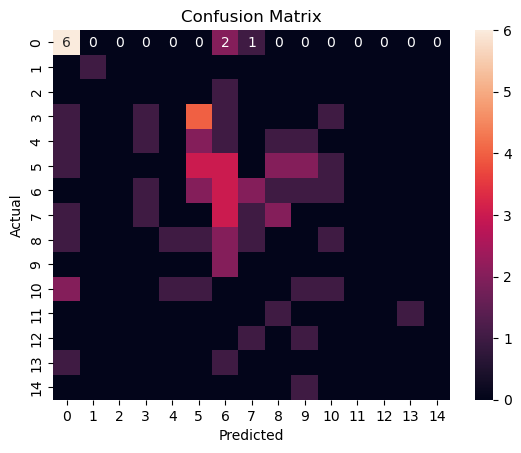

In [19]:
matrix = confusion_matrix(y_test, y_predict)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()